<a href="https://colab.research.google.com/github/elizleon/mineriaDatos/blob/main/Representaci%C3%B3n_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Universidad Nacional de Colombia
##Minería de Datos - PLN

## Prof. Elizabeth León
## **Ejercicio Transformación de texto y extracción de características**


---

# Representación de texto y extracción de características

Para analizar documento textuales es necesario transformar el texto a números, ya que muchos de los algoritmos de minería de datos trabajan con representaciones numéricas. Es necesario realizar preprocesamiento al texto para eliminar ruido, ambigüedad y reducir la dimensionalidad. Se necesita aplicar el proceso de extracción de características (*feature extraction*) para representar el texto en vectores numéricos que codifican características significativas en el texto.

En la presente sesión trataremos varios métodos para extracción de características desde los tradicionales basados en extracción de características manuales como Bolsa de palabras (Bag of Words - BoW) hasta aquellos basados en deep learning (Word2Vec).

## Construyendo un text corpus

Construiremos un text corpus sencillo sobre el cual demostraremos las diferentes metodologías y modelos de extracción de características.

In [1]:
# Importamos las librerías básicas
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

In [ ]:
# Popular corpus and classes
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
# Definimos un corpus de prueba sencillo
corpus = ['The sky is blue and beautiful.',
'Love this blue and beautiful sky!',
'The quick brown fox jumps over the lazy dog.',
"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
'I love green eggs, ham, sausages and bacon!',
'The brown fox is quick and the blue dog is lazy!',
'The sky is very blue and the sky is very beautiful today',
'The dog is lazy but the brown fox is quick!'
]

In [ ]:
# Asignamos un label para cada oración
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

In [ ]:
# Convertimos el corpus a un Pandas dataframe
corpus = np.array(corpus)
corpus_df = pd.DataFrame({"Document": corpus, "Category": labels})
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


#### Preprocesamiento

Antes de extraer características debemos preprocesar el texto, eliminado los caracteres innecesarios, los signos de puntuación, los stop words, tokenizar, etc.  

In [ ]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
def normalize_document(doc):
  # lowercase and remove special characters\whitespace
  doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
  doc = doc.lower()
  doc = doc.strip()
  # tokenize document
  tokens = wpt.tokenize(doc)
  # filter stopwords out of document
  filtered_tokens = [token for token in tokens if token not in stop_words]
  # re-create document from filtered tokens
  doc = ' '.join(filtered_tokens)
  return doc

In [ ]:
# Vectorizamos la función de extracción de características
normalize_corpus = np.vectorize(normalize_document)

In [ ]:
# Normalizamos el corpus
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

Con el corpus preprocesado procedemos a aplicar los diferentes extractores de características.

## Bolsa de Palabras - Bag of Words (Bow)

Es el modelo de representación vectorial más simple, representa cada documentos en el corpus como un vector numérico donde cada dimensión es una palabra especifica en el corpus y el valor puede ser un conteo de frecuencia de la palabra en el documento, la ocurrencia o no de la palabra en el documento (0 si la palabra no se encuentra en el documento; 1 en otro caso), incluso pueden ser valores de pesados.

Este modelo no toma en cuenta la secuencia de palabras, gramática o semántica.  

In [ ]:
# Importamos el extractor de características BoW de Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Instanciamos el extractor de características para la ocurrencia de palabras
cv = CountVectorizer(min_df=0., max_df=1.)
# Extraemos las características del corpus
cv_matrix = cv.fit_transform(norm_corpus)
# El resultado es una matriz sparse
cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [ ]:
# Visualizamos las carcterísticas distintas de zero
print(cv_matrix)

  (0, 17)	1
  (0, 3)	1
  (0, 2)	1
  (1, 17)	1
  (1, 3)	1
  (1, 2)	1
  (1, 14)	1
  (2, 15)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1
  (2, 13)	1
  (2, 6)	1
  (3, 12)	1
  (3, 4)	1
  (3, 16)	1
  (3, 10)	1
  (3, 0)	1
  (3, 7)	1
  (3, 18)	1
  (3, 1)	1
  (4, 14)	1
  (4, 16)	1
  (4, 10)	1
  (4, 0)	1
  (4, 7)	1
  (4, 9)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
  (5, 8)	1
  (5, 13)	1
  (5, 6)	1
  (6, 17)	2
  (6, 3)	1
  (6, 2)	1
  (6, 19)	1
  (7, 15)	1
  (7, 5)	1
  (7, 8)	1
  (7, 13)	1
  (7, 6)	1


El resultado es una matriz sparse porque el número de palabras puede incrementarse de manera exponencial con cada nuevo documento, pues cada palabra distinta se convierte en una nueva característica. El resultado previo muestra los pares (**x**,**y**) de la matriz de características que son distintos de cero, donde **x** representa a un documento y **y** representa un termino en el corpus.

In [ ]:
# Convertimos de la representación sparse a la densa para visualizarla como numpy array
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

Como podemos observar cada documento es representado como una fila y cada columna representa una palabra en el corpus. Podemos visualizarlo mejor usando un pandas dataframe.

In [ ]:
# Obtenemos todas las palabras diferentes en el corpus
vocab = cv.get_feature_names()
# Mostramos el documento y las features
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


Se puede ver claramente que cada columna o dimensión representa una palabra en el corpus y cada fila representa un documento. Cada celda representa el número de veces que una palabra (columna) aparece en un documento (fila).

## TF-IDF

El modelo BoW tiene algunos limitantes cuando se aplica a grandes corpus de documentos. Por ejemplo puede darse el caso que un término se repita de manera común en muchos de los documentos del corpus, estos términos comunes tienden a opacar términos que son más representativos de una clase o documento. Para solventar esta limitación surge TF-IDF que significa **term frequency-inverse document frequency**, esto es la combinación de dos medidas, la frecuencia del término (tf) y la inversa de la frecuencia del documento (idf). Este modelo fue originalmente propuesto como métrica para la evaluación de resultados en motores de búsqueda y se convirtió en un estándar dentro de los sistemas de extracción de características para recuperación de información.

Formalmente podemos definir tf-idf como sigue:
$$tfidf=tf \times idf$$
Es decir tf-idf es el producto del valor tf y el valor idf. El valor tf se puede definir como:
$$tf(w,D) = f_{w_D}$$
Donde $f_{w_D}$ denota la frecuencia de la palabra **w** en el documento **D**, esto es la frecuencia del término (tf). En algunas ocasiones también se puede normalizar esta frecuencia utilizando logaritmos o promedios de frecuencia, sin embargo nosotros utilizaremos la frecuencia absoluta en nuestros cálculos.

*Inverse document frequency* (idf) es la inversa de la frecuencia de los documentos y la obtenemos dividiendo el número total de documentos en el corpus entre el número de documentos que contienen el término **w** (frecuencia de documento) y luego aplicamos un escalado logarítmico al resultado. Adicionalmente sumamos 1 a la frecuencia de documento para evitar errores e indeterminaciones provenientes de la división por 0. También sumamos 1 al idf para tomar en cuenta aquellos términos que podrían tener un idf de cero. Matemáticamente la implementación de idf es:
$$idf(w,D)=1+log \frac{N}{1+df(w)}$$
donde $idf(w,D)$ representa la idf para el término o palabra **w** en el documento **D**, **N** representa el total de documentos en el corpus, y $df(w)$ representa el número de documentos que contienen el término **w**.

Finalmente también podemos normalizar el vector tf-idf dividiéndolo por su norma euclidiana ($L_2$), podemos representar este proceso como sigue:
$$tfidf=\frac{tfidf}{||tfidf||}$$
donde $||tfidf||$ representa la norma euclidiana ($L_2$) de la matriz tf-idf. Existen múltiples variantes de este modelo pero todas terminan con resultados similares. Vamos a aplicar este modelo a nuestro corpus.

In [ ]:
# Importamos el extractor de características tf-idf de scikit-learn
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# Creamos el objeto tf-idf transformer y extraemos las características del corpus
tt = TfidfTransformer(norm="l2", use_idf=True)
# Obtenemos la matrix tf-idf del modelo BoW
tt_matrix = tt.fit_transform(cv_matrix)

In [ ]:
# Visualizamos la matrix tf-idf
tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


TfidfTransformer toma como entrada el vector de Bag of Words y lo transforma en su representación tf-idf. No es necesario calcular el modelo BoW antes de obtener la representación tf-idf, con la clase TfidfVectorizer podremos obtener la representación tf-idf directamente del texto como se muestra a continuación.

In [ ]:
# Importamos el extractor de características de scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Instanciamos la clase
tv = TfidfVectorizer(min_df=0., max_df=1., norm="l2", use_idf=True, smooth_idf=True)
# Entrenamos y extraemos características
tv_matrix= tv.fit_transform(norm_corpus)

In [ ]:
# Visualizamos el resultado tf-idf obtenido
tv_matrix= tv_matrix.toarray()
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


## Extracción de características con Word2Vec

Los modelos de extracción de características utilizados hasta el momento están basados en conteo y frecuencia pero no toman en cuenta importantes características del texto como son por ejemplo la secuencia, estructura, contexto y significado. Word2vec es un modelo de  *word embedding* creado por Google en 2013, está basado en deep learning y su objetivo es transformar las palabras en vectores numéricos densos dentro de un espacio vectorial continuo que captura la información contextual y semántica.

Esencialmente este modelo es no supervisado tomando grandes cantidades de texto, crea un vocabulario de las posibles palabras y genera *dense word embeddings*. Usualmente es posible definir el tamaño de los vectores de *word embedding*. Esto hace que la representación de word embedding sea más compacta que aquella obtenida del modelo BoW que por naturaleza es sparse.

Para entrenar nuestro modelo word2vec necesitamos un corpus mucho más grande por ello usaremos el corpus de la biblia, que importaremos aquí.

In [ ]:
# Importamos el corpus
from nltk.corpus import gutenberg
# Importamos módulo para manejar la puntuación
from string import punctuation

In [ ]:
# Cargamos el corpus
bible = gutenberg.sents("bible-kjv.txt")
# Definimos los términos a remover
remove_terms = punctuation + "0123456789"

In [ ]:
# Normalizamos el texto
norm_bible = [ [word.lower() for word in sent if word not in remove_terms] for sent in bible]
norm_bible = [' '.join(tok_sent) for tok_sent in norm_bible]
norm_bible = filter(None, normalize_corpus(norm_bible))
norm_bible = [tok_sent for tok_sent in norm_bible if len(tok_sent.split()) > 2]
# imprimimos el número total de filas, un ejemplo de linea raw y procesada
print('Total lines:', len(bible))
print('\nSample line:', bible[10])
print('\nProcessed line:', norm_bible[10])

Total lines: 30103

Sample line: ['1', ':', '6', 'And', 'God', 'said', ',', 'Let', 'there', 'be', 'a', 'firmament', 'in', 'the', 'midst', 'of', 'the', 'waters', ',', 'and', 'let', 'it', 'divide', 'the', 'waters', 'from', 'the', 'waters', '.']

Processed line: god said let firmament midst waters let divide waters waters


Existen numerosas implementaciones del algoritmo Word2vec sin embargo las más eficientes se encuentran dentro de la librería gemsim usaremos esta implementación para entrenar un modelo de word2vec y extraer características con él.

In [ ]:
# Instalamos el módulo word2vec
!pip install gensim

In [ ]:
# Importamos word2vec from gemsim
from gensim.models import word2vec

In [ ]:
# tokenize en oraciones el corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in norm_bible]

Los siguientes parámetros son utilizados por el modelo Word2vec para construir el modelo:
* feature_size: Determina la dimensión de los vectores de embedding
* window_context: Es el número de palabras que tomará en cuenta el modelo para construir el contexto
* min_word_count: Especifica el conteo mínimo de una palabra dentro del corpus para ser tomada en cuenta dentro del vocabulario
* sample: este parámetro es usado para el sub-muestreo dentro del algoritmo. Los valores entre 0.01 entre 0.0001 son usualmente ideales.

In [ ]:
# Set values for various parameters
feature_size = 100 # Word vector dimensionality
window_context = 30 # Context window size
min_word_count = 1 # Minimum word count
sample = 1e-3 # Downsample setting for frequent words

In [ ]:
# definimos el modelo y lo entrenamos
w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size,
                              window=window_context, min_count=min_word_count,
                              sample=sample, iter=50)

In [ ]:
# Visualizamos las palabras que son similares de acuerdo al modelo de gensim
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                 for search_term in ['god', 'jesus', 'noah','egypt', 'john', 'gospel', 'moses','famine']}
similar_words

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'egypt': ['egyptians', 'pharaoh', 'bondage', 'rid', 'rod'],
 'famine': ['pestilence', 'peril', 'blasting', 'overtaketh', 'mildew'],
 'god': ['lord', 'worldly', 'sworn', 'ever', 'promised'],
 'gospel': ['christ', 'faith', 'preach', 'afflictions', 'godly'],
 'jesus': ['peter', 'messias', 'apostles', 'cross', 'synagogue'],
 'john': ['baptist', 'james', 'devine', 'galilee', 'zebedee'],
 'moses': ['congregation', 'children', 'elisheba', 'naashon', 'joshua'],
 'noah': ['ham', 'shem', 'japheth', 'kenan', 'enosh']}

Vamos a visualizar las palabras de interés y sus similares usando su presentación de embedding, después de reducir su dimensionalidad a un espacio 2D con t-SNE.

In [ ]:
# Para reducir la dimensionalidad del word embedding
from sklearn.manifold import TSNE

In [ ]:
# Obtenemos las palabras similares
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

In [ ]:
# Reducimos la dimensionalidad
tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

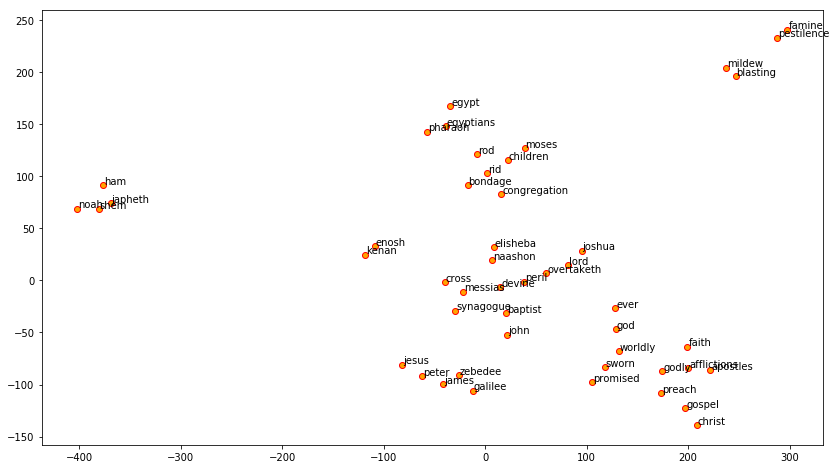

In [ ]:
# Visualizamos
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
  plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

Como podemos observar las palabras similares aparecen cerca en este espacio formando grupos.

#### Estrategia para la extracción de características con Word2vec

Ahora que hemos entrenado el modelo Word2vec lo podremos utilizar para extraer las características de los documentos.

Para obtener la representación de una palabra desde el modelo de embedding utilizamos una palabra como clave del diccionario wv dentro del modelo.

In [ ]:
# Obtenemos la representación de word embedding para la palabra sky
w2v_model.wv["sky"]

array([ 0.13906665, -0.09467818,  0.03351992,  0.27260017,  0.5489181 ,
        0.09396461,  0.27909434,  0.02730848, -0.5168682 , -0.74485075,
        0.35855186,  0.26168385,  0.40251988,  0.04674069,  0.08227883,
        0.06284666,  0.40914953, -0.868972  , -0.46806145, -0.20395283,
        0.26269644, -0.16583093,  0.21720047, -1.1470268 ,  0.64572006,
        0.2179737 ,  0.57766604, -0.07732975,  0.10162247,  0.35236475,
       -0.3371417 ,  0.17316462,  0.3121608 , -0.15885124,  0.5577189 ,
       -0.53220177, -0.43150327,  1.1746895 , -0.5024037 ,  0.15712567,
       -0.12766321, -0.20109402,  0.43525183, -0.17893094, -0.8144733 ,
       -0.79684144,  0.8236569 , -0.2813059 , -0.64945453, -0.22779943,
       -0.67609227, -0.24860808,  0.29617646,  0.40474543,  1.1627791 ,
       -0.66091585, -0.12663774, -0.6829365 , -0.41497838, -0.23677988,
       -0.22100426,  0.7180309 , -0.00584291,  0.3720943 ,  0.40510976,
        0.24102566, -0.653215  , -0.67209685, -0.78019905, -0.20

Debido a que cada documento puede tener un numero distinto de palabras una estrategia muy común para obtener la representación Word2vec a escala de documento es extraer la representación de cada palabra en el documento y promediar estas representaciones dado que todas ellas tienen la misma dimensión.

In [ ]:
# Función para extraer características a nivel de documento
def average_word_vectors(words, model, vocabulary, num_features):
  feature_vector = np.zeros((num_features,),dtype="float64")
  nwords = 0.
  for word in words:
    if word in vocabulary:
      nwords = nwords + 1.
      feature_vector = np.add(feature_vector, model[word])
  if nwords:
    feature_vector = np.divide(feature_vector, nwords)
  return feature_vector

In [ ]:
# Función vectorizada para aplicarla al corpus entero
def averaged_word_vectorizer(corpus, model, num_features):
  vocabulary = set(model.wv.index2word)
  features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features) for tokenized_sentence in corpus]
  return np.array(features)

In [ ]:
# Aplicamos al corpus de la biblia
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus,
model=w2v_model, num_features=feature_size)
# Visualizamos algunas de las representaciones
pd.DataFrame(w2v_feature_array).head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1.532842,0.140309,-0.333336,-0.784747,-1.827758,-0.151597,0.354927,0.410041,0.290936,1.486643,-0.961085,-2.082458,0.287470,-0.376133,-0.557385,-0.603392,0.823411,-1.134902,-0.813035,0.138361,-0.622539,-0.884037,0.589443,0.599244,-0.434928,-0.056931,0.386877,-1.304629,-0.071916,0.017805,1.067952,0.442997,-0.683415,0.290482,1.373441,-1.414913,0.884743,-1.262567,-0.289415,0.488108,...,1.120048,0.630364,0.122726,2.031761,-0.055893,1.448713,-0.204678,-1.870695,1.644773,-0.742985,-0.930501,-0.460158,0.054655,0.811828,-0.217333,0.674517,-1.108662,0.303383,-1.125366,-0.676069,-0.108096,0.499318,1.253587,0.262793,1.154885,1.690642,0.813351,0.820589,-0.642775,0.282380,0.149251,-0.265953,-0.056582,-0.476263,1.273418,-0.937739,-1.323298,0.769732,-0.485300,-0.568739
1,0.666762,-0.143794,-0.442963,-0.576690,-1.275354,-0.998174,-0.146759,0.879924,1.341365,0.978886,-0.231094,-1.644314,-0.491945,0.215222,-0.486480,-1.106724,1.022923,-0.049618,-0.127286,0.517970,-0.734609,-0.998370,0.787060,1.272580,0.203808,-0.777243,-0.005262,-2.358310,-0.095952,0.381502,0.247634,0.224625,-0.227950,0.032097,0.795232,0.418362,0.278678,-0.541234,-0.791549,-0.088832,...,0.227955,0.117184,0.058699,0.700803,-0.144747,1.083683,-1.126977,-1.867141,0.658834,-1.601521,0.135908,0.596416,-0.028338,-0.985066,0.402256,0.406297,0.277601,0.492491,0.411785,-0.148689,-0.476687,0.025912,0.311097,0.507197,0.201139,1.562022,1.125666,0.072363,-0.018190,0.685370,0.452535,-0.471679,-0.023094,-0.337895,0.363903,-0.307778,-0.617991,0.997004,-0.629949,-0.566559
2,1.069362,-0.233245,-0.707548,-0.405131,-0.866063,0.839984,1.651828,0.202760,-0.172361,0.012175,0.314611,-0.378888,-1.195380,2.153757,0.776169,1.435112,0.446506,0.619781,0.202351,0.837998,-1.247207,-1.373395,0.200648,-1.422069,-0.544383,0.661354,1.316703,-0.681727,0.473052,-0.495689,1.304235,-1.088760,-0.257970,-0.903322,-1.168772,1.285644,0.115640,0.490505,-0.476049,0.914780,...,0.525266,-1.179180,0.582951,-1.695184,-0.632616,2.306023,2.140273,1.473589,-1.012092,0.353060,-1.457367,1.477214,-0.500333,0.937077,1.073265,1.860083,0.544829,-0.845580,1.275040,-0.099287,-1.041283,0.112604,0.885988,0.506146,-0.386344,0.706634,0.598918,0.722697,1.182420,1.124700,0.792663,-1.249455,-0.581341,-1.374341,0.337161,-0.357903,-0.434465,0.016996,-0.042338,1.655730
3,-0.976323,-1.551348,-0.806916,0.091348,-0.281060,0.707184,1.612100,0.639998,1.892194,-2.855943,1.089907,0.698763,0.089840,0.616718,0.904314,-0.962115,0.796160,-1.540566,-0.951313,-1.512815,-2.225848,0.219198,1.527213,-1.101838,-0.542287,-1.723024,1.931434,0.070675,-1.436893,0.074469,-0.946199,0.288246,-0.193207,-2.502442,-0.868171,0.670265,-0.873386,0.041233,0.061845,0.397624,...,-2.388051,0.258765,0.206220,1.019654,0.379899,0.216348,-0.527735,0.743787,0.146710,-1.255293,-0.048208,-1.226158,-1.530687,-1.510438,1.230017,-0.414763,-0.098846,0.218546,-0.880817,-0.287900,0.479283,-0.359908,0.209833,1.040364,-0.060657,1.645617,1.812268,-0.333812,1.613451,1.614318,-0.391445,-0.685564,-0.604894,1.555282,-1.473485,-0.965220,0.972768,0.143044,1.113312,-0.068937
4,-1.206243,0.055220,-0.024269,1.154566,0.384821,0.923375,0.542934,0.061543,0.978539,-2.532515,0.328963,-0.089059,-1.015339,-0.616124,-0.677737,0.332761,-0.410661,-1.283385,0.541153,-0.869652,-0.952599,0.342414,0.373662,-0.063580,0.430808,-1.422466,1.846456,1.273539,0.432351,1.459942,-0.417334,0.672892,-0.912072,-0.649610,-0.283379,0.199266,-1.628320,1.010332,0.823642,-0.885436,...,-0.887001,0.765091,0.347362,-0.119907,1.155579,-0.634465,0.412195,1.427624,-0.324900,-0.801008,-0.512062,-0.765594,-0.033555,-0.194099,0.529777,1.102575,-0.289583,-0.467591,-0.388407,0.457916,-0.331597,0.318833,0.121515,0.215371,-0.086138,1.056007,0.904831,0.428567,1.165235,-0.155509,0.914150,-0.211434,0.433467,0.381900,-0